# Optimization, Newton Methods, & Profit Maximization

### Import relevant packages

In [1]:
import sympy as sm
import numpy as np
import pandas as pd
from itertools import cycle

from mpl_toolkits import mplot3d  # noqa: F401
import matplotlib.pyplot as plt
from matplotlib import animation  # noqa: F401
import matplotlib.ticker as mtick
from matplotlib.ticker import FuncFormatter

from optimization import (
    newton_method,
    gradient_descent,
    constrained_newton_method,
    get_hessian,  # noqa: F401
    get_gradient,  # noqa: F401
)

import statsmodels.api as stats

## Part 1: Basic Optimization Theory

### Gradient Descent

In [2]:
## Gradient Descent Visualization

x = sm.symbols("x")

objective = 3 * x**2 + 2 * x - 24
symbols = [x]
x0 = {x: 3}

x_star = gradient_descent(objective, symbols, x0, iterations=20)

Starting Values: [3]
Step 1: [1.]
Step 2: [0.2]
Step 3: [-0.12]
Step 4: [-0.248]
Step 5: [-0.2992]
Step 6: [-0.31968]
Step 7: [-0.327872]
Step 8: [-0.3311488]
Step 9: [-0.33245952]
Step 10: [-0.33298381]
Step 11: [-0.33319352]

Convergence Achieved (12 iterations): Solution = {x: -0.33327740928}


### Newton Method

In [3]:
## Optimization

x, y = sm.symbols("x y")

objective = 100 * (y - x**2) ** 2 + (1 - x) ** 2
Gamma = [x, y]
Gamma0 = {x: -1.2, y: 1}

NM_values = newton_method(objective, Gamma, Gamma0)

Starting Values: [-1.2  1. ]
Step 1: [-1.1752809   1.38067416]
Step 2: [ 0.76311487 -3.17503385]
Step 3: [0.76342968 0.58282478]
Step 4: [0.99999531 0.94402732]
Step 5: [0.9999957  0.99999139]

Convergence Achieved (6 iterations): Solution = {x: 0.9999999999999999, y: 0.9999999999814724}


## Part 2: Constrained Optimization Theory

### Lagrangian 

In [4]:
## Optimization

x, y, λ = sm.symbols("x y λ")

Langrangian_objective = 100 * (y - x**2) ** 2 + (1 - x) ** 2 + λ * (x**2 - y - 2)
Gamma = [x, y, λ]
Gamma0 = {x: -1.2, y: 1, λ: 1}

L_values = newton_method(Langrangian_objective, Gamma, Gamma0)

Starting Values: [-1.2  1.   1. ]
Step 1: [  -1.17555556   -0.61866667 -400.        ]
Step 2: [   0.7677616   -5.1870237 -400.       ]
Step 3: [   0.76806868   -1.4100706  -400.        ]
Step 4: [   0.99999563   -1.05379886 -400.        ]
Step 5: [   0.999996   -1.000008 -400.      ]

Convergence Achieved (6 iterations): Solution = {x: 0.9999999999999999, y: -1.0000000000160152, λ: -400.0}


### Logarithmic Barrier Function

In [5]:
## Optimization

x, y, ρ = sm.symbols("x y ρ")

Barrier_objective = 100 * (y - x**2) ** 2 + (1 - x) ** 2 - ρ * sm.log((-x) * (y - 3))
Gamma = [x, y, ρ]  # Function requires last symbol to be rho!
Gamma0 = {x: -15, y: 15, ρ: 10}

barrier_values = constrained_newton_method(Barrier_objective, Gamma, Gamma0)

Step 0 w/ {ρ: 10}
Starting Values: [-15  15]
Convergence Achieved (17 iterations): Solution = {x: -3.739756319373101, y: 13.990326783551538}

Step 1 w/ {ρ: 9.0}
Starting Values: [-3.73975632 13.99032678]
Convergence Achieved (5 iterations): Solution = {x: -3.5651000852143717, y: 12.714570834578089}

Step 2 w/ {ρ: 8.1}
Starting Values: [-3.56510009 12.71457083]
Convergence Achieved (5 iterations): Solution = {x: -3.402264760327976, y: 11.58012570993156}

Step 3 w/ {ρ: 7.29}
Starting Values: [-3.40226476 11.58012571]
Convergence Achieved (5 iterations): Solution = {x: -3.250794181169271, y: 10.572476293185266}

Step 4 w/ {ρ: 6.561}
Starting Values: [-3.25079418 10.57247629]
Convergence Achieved (5 iterations): Solution = {x: -3.1102458335536602, y: 9.678541146019919}

Step 5 w/ {ρ: 5.9049000000000005}
Starting Values: [-3.11024583  9.67854115]
Convergence Achieved (5 iterations): Solution = {x: -2.9801849149853936, y: 8.886517741371454}

Step 6 w/ {ρ: 5.3144100000000005}
Starting Values:

### Putting them together

In [6]:
## Optimization

x, y, λ, ρ = sm.symbols("x y λ ρ")

combined_objective = (
    100 * (y - x**2) ** 2
    + (1 - x) ** 2
    + λ * (x**2 - y - 2)
    - ρ * sm.log((-x) * (y - 3))
)
Gamma = [x, y, λ, ρ]  # Function requires last symbol to be ρ!
Gamma0 = {x: -15, y: 15, λ: 0, ρ: 10}

combined_values = constrained_newton_method(combined_objective, Gamma, Gamma0)

Step 0 w/ {ρ: 10}
Starting Values: [-15  15   0]
Convergence Achieved (15 iterations): Solution = {x: -3.9631764104337135, y: 13.706767260218255, λ: -400.93398873413037}

Step 1 w/ {ρ: 9.0}
Starting Values: [  -3.96317641   13.70676726 -400.93398873]
Convergence Achieved (5 iterations): Solution = {x: -3.802167311247783, y: 12.456476262721091, λ: -400.951728714794}

Step 2 w/ {ρ: 8.1}
Starting Values: [  -3.80216731   12.45647626 -400.95172871]
Convergence Achieved (5 iterations): Solution = {x: -3.6534890867704632, y: 11.347982507150826, λ: -400.97029431878434}

Step 3 w/ {ρ: 7.29}
Starting Values: [  -3.65348909   11.34798251 -400.97029432]
Convergence Achieved (5 iterations): Solution = {x: -3.5166013015724937, y: 10.366484714221338, λ: -400.9896172031588}

Step 4 w/ {ρ: 6.561}
Starting Values: [  -3.5166013    10.36648471 -400.9896172 ]
Convergence Achieved (5 iterations): Solution = {x: -3.3909548710786486, y: 9.498574937692009, λ: -401.0096059617542}

Step 5 w/ {ρ: 5.904900000000

## Part 3: Econometric Profit Maximization

### Data Generating Process

In [7]:
def quantity_ar2_process(T, ϕ1, ϕ2, q0, q_1, ϵ, df, params):
    A = np.identity(T)  # The T x T identity matrix

    for i in range(T):
        if i - 1 >= 0:
            A[i, i - 1] = -ϕ1

        if i - 2 >= 0:
            A[i, i - 2] = -ϕ2

    b = np.array(df) @ params + ϵ

    b[0] = b[0] + ϕ1 * q0 + ϕ2 * q_1
    b[1] = b[1] + ϕ2 * q0

    return np.linalg.inv(A) @ b

In [8]:
df = pd.DataFrame()

## Digital Advertising - ln(δ)
df["log_digital_advertising"] = np.log(
    np.random.normal(loc=50000, scale=15000, size=120).round()
)

## Television Advertising - ln(τ)
df["log_television_advertising"] = np.log(
    np.random.normal(loc=50000, scale=15000, size=120).round()
)

## Matrix X of covariates

# Lag Digital Advertising
df["log_digital_advertising_lag1"] = df["log_digital_advertising"].shift(1)
df["log_digital_advertising_lag2"] = df["log_digital_advertising"].shift(2)

# Lag Television Advertising
df["log_television_advertising_lag1"] = df["log_television_advertising"].shift(1)
df["log_television_advertising_lag2"] = df["log_television_advertising"].shift(2)

# Price
df["price"] = np.random.normal(loc=180, scale=15, size=120).round()
df["price_lag1"] = df["price"].shift(1)
df["price_lag2"] = df["price"].shift(2)

# Competitor Price
df["comp_price"] = np.random.normal(loc=120, scale=15, size=120).round()
df["comp_price_lag1"] = df["comp_price"].shift(1)
df["comp_price_lag2"] = df["comp_price"].shift(2)

# Seasonality

months = cycle(
    [
        "Jan",
        "Feb",
        "Mar",
        "Apr",
        "May",
        "June",
        "July",
        "Aug",
        "Sep",
        "Oct",
        "Nov",
        "Dec",
    ]
)
df["months"] = [next(months) for m in range(len(df))]

one_hot = pd.get_dummies(df["months"], dtype=int)
one_hot = one_hot[
    [
        "Jan",
        "Feb",
        "Mar",
        "Apr",
        "May",
        "June",
        "July",
        "Aug",
        "Sep",
        "Oct",
        "Nov",
        "Dec",
    ]
]
df = df.join(one_hot).drop("months", axis=1)

## Constant
df["constant"] = 1

# Drop NaN (Two lags)
df = df.dropna()

df

,log_digital_advertising,log_television_advertising,log_digital_advertising_lag1,log_digital_advertising_lag2,log_television_advertising_lag1,log_television_advertising_lag2,price,price_lag1,price_lag2,comp_price,...,Apr,May,June,July,Aug,Sep,Oct,Nov,Dec,constant
2,10.579387,10.780642,10.254813,10.467607,9.760714,10.865325,190.0,173.0,188.0,104.0,...,0,0,0,0,0,0,0,0,0,1
3,10.903384,10.834588,10.579387,10.254813,10.780642,9.760714,192.0,190.0,173.0,134.0,...,1,0,0,0,0,0,0,0,0,1
4,10.150191,10.965661,10.903384,10.579387,10.834588,10.780642,176.0,192.0,190.0,127.0,...,0,1,0,0,0,0,0,0,0,1
5,10.829570,11.196405,10.150191,10.903384,10.965661,10.834588,224.0,176.0,192.0,138.0,...,0,0,1,0,0,0,0,0,0,1
6,10.817556,10.385204,10.829570,10.150191,11.196405,10.965661,191.0,224.0,176.0,116.0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,8.641356,10.751499,11.019514,10.838188,10.742076,10.310385,183.0,179.0,178.0,130.0,...,0,0,0,0,1,0,0,0,0,1
116,10.941500,11.039315,8.641356,11.019514,10.751499,10.742076,183.0,183.0,179.0,93.0,...,0,0,0,0,0,1,0,0,0,1
117,10.653393,10.284933,10.941500,8.641356,11.039315,10.751499,153.0,183.0,183.0,118.0,...,0,0,0,0,0,0,1,0,0,1
118,10.874967,11.100526,10.653393,10.941500,10.284933,11.039315,171.0,153.0,183.0,105.0,...,0,0,0,0,0,0,0,1,0,1


In [9]:
params = np.array(
    [
        10_000,
        5_000,
        2_000,
        1_000,
        3_000,
        1_000,
        -1_000,
        -500,
        -100,
        500,
        300,
        100,
        25_000,
        15_000,
        15_000,
        10_000,
        10_000,
        10_000,
        15_000,
        15_000,
        25_000,
        35_000,
        35_000,
        40_000,
        50_000,
    ]
)

In [10]:
## Quantity Demand AR(2) component process

# parameters
T = 118
ϕ1 = 0.3
ϕ2 = 0.05
q0 = 300_000
q_1 = 250_000
ϵ = np.random.normal(0, 5000, size=T)

quantity_demanded_ar = quantity_ar2_process(T, ϕ1, ϕ2, q0, q_1, ϵ, df, params)

df["quantity_demanded"] = quantity_demanded_ar
df["quantity_demanded_lag1"] = df["quantity_demanded"].shift(1)
df["quantity_demanded_lag2"] = df["quantity_demanded"].shift(2)

df = df[2:]

### Fitting OLS using our numerical optimization tools, analytically, and using statsmodels

In [11]:
## Fit Model using our Tools

variablez = list(df.drop(["quantity_demanded", "July"], axis=1).columns)
symbols = []

for i in variablez:
    i = sm.symbols(f"{i}")
    symbols.append(i)

y = np.array(df["quantity_demanded"])
X = np.array(df.drop(["quantity_demanded", "July"], axis=1))
β = np.array(symbols)

objective = (y - X @ β).T @ (y - X @ β)  # Residual Sum of Squares
β0 = dict(zip(symbols, [0] * len(symbols)))  # Initial guess (0 for all)

β_numerical = newton_method(objective, symbols, β0)

Starting Values: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Step 1: [ 1.03446135e+04  6.12951985e+03  2.38307584e+03  7.39214391e+01
  3.73922110e+03  7.39906409e+02 -1.00984239e+03 -5.46201953e+02
 -1.13570812e+02  4.65125606e+02  2.59077156e+02  1.76957292e+02
  1.16400394e+04 -1.95282284e+03 -2.46504841e+03 -6.07366764e+03
 -6.91859571e+03 -4.01573959e+03  3.51661043e+03  1.19837029e+04
  2.28175909e+04  2.22463621e+04  2.48162149e+04  6.59545018e+04
  2.24871784e-01  1.03214670e-01]

Convergence Achieved (2 iterations): Solution = {log_digital_advertising: 10344.613492707269, log_television_advertising: 6129.519850981785, log_digital_advertising_lag1: 2383.0758400582254, log_digital_advertising_lag2: 73.92143868670627, log_television_advertising_lag1: 3739.2210963199386, log_television_advertising_lag2: 739.9064088568058, price: -1009.8423852174328, price_lag1: -546.2019532633567, price_lag2: -113.57081217258848, comp_price: 465.1256061767881, comp_price_lag1: 259.077156

In [12]:
β_analytical = np.linalg.inv(X.T @ X) @ X.T @ y

df_residuals = len(X) - len(β_analytical)
σ2 = 1 / df_residuals * ((y - X @ β_analytical).T @ (y - X @ β_analytical))  # MSE
Σ = σ2 * np.linalg.inv(X.T @ X)
standard_errors = np.sqrt(np.diag(Σ))

In [13]:
## Fit model

y = df["quantity_demanded"]
X = df.drop(["quantity_demanded", "July"], axis=1)

mod = stats.OLS(y, X)
results = mod.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:      quantity_demanded   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     119.7
Date:                Sun, 03 Mar 2024   Prob (F-statistic):           2.04e-58
Time:                        20:05:58   Log-Likelihood:                -1138.5
No. Observations:                 116   AIC:                             2329.
Df Residuals:                      90   BIC:                             2401.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
log_digita

In [14]:
ols_results = pd.DataFrame()

ols_results["variable"] = variablez
ols_results["β_numerical"] = list(β_numerical.values())
ols_results["β_analytical"] = β_analytical
ols_results["std_err_analytical"] = standard_errors
ols_results["β_statsmodels"] = list(results.params)
ols_results["std_err_statsmodels"] = list(results.bse)

ols_results = ols_results.set_index("variable")
ols_results

,β_numerical,β_analytical,std_err_analytical,β_statsmodels,std_err_statsmodels
variable,,,,,
log_digital_advertising,10344.613493,10344.613493,1364.889995,10344.613493,1364.889995
log_television_advertising,6129.519851,6129.519851,1628.934238,6129.519851,1628.934238
log_digital_advertising_lag1,2383.075840,2383.075840,1723.647791,2383.075840,1723.647791
log_digital_advertising_lag2,73.921439,73.921439,1417.784963,73.921439,1417.784963
log_television_advertising_lag1,3739.221096,3739.221096,1691.882803,3739.221096,1691.882803
log_television_advertising_lag2,739.906409,739.906409,1600.751719,739.906409,1600.751719
price,-1009.842385,-1009.842385,34.006725,-1009.842385,34.006725
price_lag1,-546.201953,-546.201953,100.835033,-546.201953,100.835033
price_lag2,-113.570812,-113.570812,52.488935,-113.570812,52.488935


### Prepare Symbolic Objective Function

In [15]:
# Build Symbolic Functions with all variables in function
δ, τ, λ, ρ = sm.symbols("δ τ λ ρ")


price = 180
comp_price = 120
Jan = 1

## Obtain Lagged Values
log_digital_advertising_lag1 = df["log_digital_advertising_lag1"].iloc[-1]
log_digital_advertising_lag2 = df["log_digital_advertising_lag2"].iloc[-2]
log_television_advertising_lag1 = df["log_television_advertising_lag1"].iloc[-1]
log_television_advertising_lag2 = df["log_television_advertising_lag2"].iloc[-2]
price_lag1 = df["price_lag1"].iloc[-1]
price_lag2 = df["price_lag2"].iloc[-2]
comp_price_lag1 = df["comp_price_lag1"].iloc[-1]
comp_price_lag2 = df["comp_price_lag2"].iloc[-2]
quantity_demanded_lag1 = df["quantity_demanded_lag1"].iloc[-1]
quantity_demanded_lag2 = df["quantity_demanded_lag2"].iloc[-2]


vars = [
    sm.log(δ),
    sm.log(τ),
    log_digital_advertising_lag1,
    log_digital_advertising_lag2,
    log_television_advertising_lag1,
    log_television_advertising_lag2,
    price,
    price_lag1,
    price_lag2,
    comp_price,
    comp_price_lag1,
    comp_price_lag2,
    Jan,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,  # All Months less July
    1,  # Constant
    quantity_demanded_lag1,
    quantity_demanded_lag2,
]

params = np.array(results.params)

# Quantity
quantity_demanded = np.array([vars]) @ params
quantity_demanded = quantity_demanded[0]

In [16]:
print(quantity_demanded)

10344.6134927055*log(δ) + 6129.51985098736*log(τ) + 26243.6986072886


In [17]:
## Profit Function
Revenue = price * quantity_demanded
Cost = quantity_demanded * (140 - 0.0001 * quantity_demanded) + τ + δ
profit = Revenue - Cost

In [18]:
print(profit)

-δ - τ - (-1.03446134927055*log(δ) - 0.612951985098736*log(τ) + 137.375630139271)*(10344.6134927055*log(δ) + 6129.51985098736*log(τ) + 26243.6986072886) + 1862030.42868699*log(δ) + 1103313.57317773*log(τ) + 4723865.74931195


In [19]:
## Optimization Problem

objective = -profit + λ * (τ + δ - 100_000) - ρ * sm.log((τ - 20_000) * (δ - 10_000))

symbols = [δ, τ, λ, ρ]
x0 = {δ: 20_000, τ: 80_000, λ: 0, ρ: 100000}

results = constrained_newton_method(objective, symbols, x0, iterations=1000)

Step 0 w/ {ρ: 100000}
Starting Values: [20000 80000     0]
Convergence Achieved (6 iterations): Solution = {δ: 58208.4965224497, τ: 41791.5034775503, λ: 15.468064294359907}

Step 1 w/ {ρ: 90000.0}
Starting Values: [5.82084965e+04 4.17915035e+04 1.54680643e+01]
Convergence Achieved (3 iterations): Solution = {δ: 58538.015709596184, τ: 41461.984290403816, λ: 15.167282340256035}

Step 2 w/ {ρ: 81000.0}
Starting Values: [5.85380157e+04 4.14619843e+04 1.51672823e+01]
Convergence Achieved (3 iterations): Solution = {δ: 58851.30854371255, τ: 41148.69145628745, λ: 14.895269996134497}

Step 3 w/ {ρ: 72900.0}
Starting Values: [5.88513085e+04 4.11486915e+04 1.48952700e+01]
Convergence Achieved (3 iterations): Solution = {δ: 59148.186683016414, τ: 40851.813316983586, λ: 14.649255276650887}

Step 4 w/ {ρ: 65610.0}
Starting Values: [5.91481867e+04 4.08518133e+04 1.46492553e+01]
Convergence Achieved (3 iterations): Solution = {δ: 59428.61414283766, τ: 40571.38585716234, λ: 14.426742787563985}

Step 5

In [20]:
digital_ad = results[δ]
television_ad = results[τ]

quantity = quantity_demanded.evalf(subs={δ: digital_ad, τ: television_ad})
revenue = Revenue.evalf(subs={δ: digital_ad, τ: television_ad})
cost = Cost.evalf(subs={δ: digital_ad, τ: television_ad})
profit = revenue - cost

print(f"Quantity: {int(quantity):,}")
print(f"Total Revenue: ${round(revenue,2):,}")
print(f"Total Cost: ${round(cost,2):,}")
print(f"Profit: ${round(profit,2):,}")

Quantity: 205,035
Total Revenue: $36,906,381.32
Total Cost: $24,601,009.60
Profit: $12,305,371.72


## Visuals Pt. 1

### Cover Photo

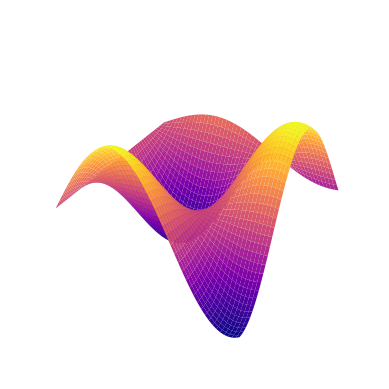

In [21]:
# Defining surface and axes
x = np.outer(np.linspace(0, 5, 50), np.ones(50))
y = x.copy().T
z = np.sin(x) * np.cos(y)

# dpi=600,figsize=(10,10)
fig = plt.figure()
# fig = plt.figure()

# syntax for 3-D plotting
ax = plt.axes(projection="3d")

# syntax for plotting
ax.plot_surface(x, y, z, cmap="plasma")

plt.axis("off")
ax.grid(False)

plt.show()

In [22]:
# def rotate(angle):
#     ax.view_init(azim=angle)

# rot_animation = animation.FuncAnimation(fig, rotate, frames=np.arange(0,362,2),interval=100)

# rot_animation.save('Images/cover_rotation2.gif', dpi=75, writer='imagemagick')

### Parabola Visual

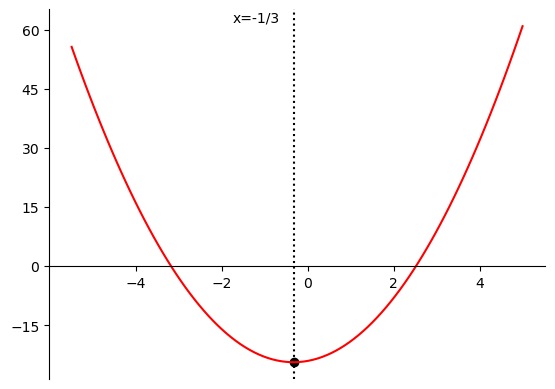

In [23]:
# Defining surface and axes
x = np.linspace(-5.5, 5, 100)
y = 3 * x**2 + 2 * x - 24

# setting the axes at the centre
# dpi=600
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
# ax.spines['left'].set_position('zero')
ax.spines["bottom"].set_position("zero")
ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")
ax.xaxis.set_ticks_position("bottom")
# ax.yaxis.set_ticks_position('right')
ax.set_yticks([60, 45, 30, 15, 0, -15])
ax.set_xticks([-4, -2, 0, 2, 4])
ax.text(x=-1.75, y=62, s="x=-1/3")
ax.axvline(x=-1 / 3, linestyle=":", color="black")

# plot the function
plt.scatter(-1 / 3, 3 * (-1 / 3) ** 2 + 2 * (-1 / 3) - 24, c="black")
plt.plot(x, y, "r")

# show the plot
plt.show()

### Gradient Descent Animation (Need to edit functions in optimization.py to run)

In [24]:
# # Defining surface and axes
# x = np.linspace(-5.5, 5, 100)
# y = 3*x**2 + 2*x - 24

# # setting the axes at the centre
# # dpi=600
# fig = plt.figure()
# ax = fig.add_subplot(1, 1, 1)
# # ax.spines['left'].set_position('zero')
# ax.spines['bottom'].set_position('zero')
# ax.spines['right'].set_color('none')
# ax.spines['top'].set_color('none')
# ax.xaxis.set_ticks_position('bottom')
# # ax.yaxis.set_ticks_position('right')
# ax.set_yticks([60,45,30,15,0,-15])
# ax.set_xticks([-4,-2,0,2,4])
# ax.text(x=-1.75,y=62,s="x=-1/3")
# ax.text(x=2.25,y=13,s="Start")
# ax.axvline(x=-1/3,linestyle=':',color='black')

# # plot the function
# plt.plot(x,y,'r')

# plt.show()

## Gradient Descent Animation

# x2=[]
# y2=[]

# def animate(iterations):
#     x2.append(float([v for v in GD_values[iterations].values()][0]))
#     y2.append(float(function.evalf(subs=GD_values[iterations])))
#     ax.scatter(x2, y2, c='black')

# rot_animation = animation.FuncAnimation(fig, animate, frames=len(GD_values),interval=500)

# rot_animation.save('Images/gradient_descent.gif', dpi=600)

### Rosenbrock's Parabolic Valley

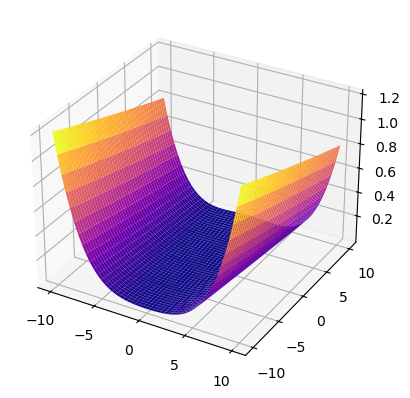

In [25]:
## Plot

# Defining surface and axes
x = np.outer(np.linspace(-10, 10, 50), np.ones(50))
y = x.copy().T
z = 100 * (y - x**2) ** 2 + (1 - x) ** 2

# dpi=600,figsize=(5,5)
fig = plt.figure()
# syntax for 3-D plotting
ax = plt.axes(projection="3d")
ax.set_xticks([-10, -5, 0, 5, 10])
ax.set_yticks([-10, -5, 0, 5, 10])

# syntax for plotting
ax.plot_surface(x, y, z, cmap="plasma")

plt.show()

# ## Rotating Visualization
# def rotate(angle):
#     ax.view_init(azim=angle)

# rot_animation = animation.FuncAnimation(fig, rotate, frames=np.arange(0,362,2),interval=100)

# rot_animation.save('Images/rotation.gif', dpi=100, writer='imagemagick')

### Newton Method Visualization (Need to edit functions in optimization.py to run)

In [26]:
# ## Plot

# # Defining surface and axes
# x = np.outer(np.linspace(-4, 4, 50), np.ones(50))
# y = x.copy().T
# z = 100*(y-x**2)**2 + (1-x)**2

# fig = plt.figure()
# # syntax for 3-D plotting
# ax = plt.axes(projection ='3d')
# # ax.set_xticks([-10,-5,0,5,10])
# # ax.set_yticks([-10,-5,0,5,10])

# # syntax for plotting
# ax.plot_surface(x, y, z, cmap ='plasma',alpha=0.6)
# ax.view_init(elev=30, azim=65)

# plt.show()


# # ## Newton Method Animation

# # x2=[]
# # y2=[]
# # z2=[]

# # def animate(iterations):

# #     # Append & plot x and y values from optimization
# #     x2.append(float([v for v in NM_values[iterations].values()][0]))
# #     y2.append(float([v for v in NM_values[iterations].values()][1]))
# #     z2.append(float(function.evalf(subs=NM_values[iterations])))
# #     ax.scatter(x2, y2, z2, c='black')
# #     ax.plot(x2, y2, z2, c='black')

# # rot_animation = animation.FuncAnimation(fig, animate, frames=len(NM_values),interval=1000)

# # rot_animation.save('Images/newton_method2.gif', dpi=100)

## Visuals Pt. 2

### Equality Constrained Rosenbrock's Parabolic Valley

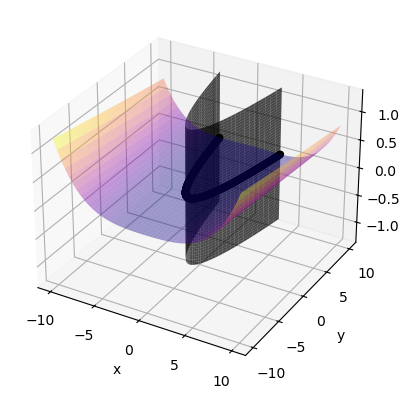

In [27]:
## Plot

# Defining surface and axes
x = np.outer(np.linspace(-10, 10, 50), np.ones(50))
y = x.copy().T
z = 100 * (y - x**2) ** 2 + (1 - x) ** 2

# Constraint
xs = np.linspace(-np.sqrt(12), np.sqrt(12), 500)
zs = np.linspace(-1.2e6, 1.2e6, 500)
X, Z = np.meshgrid(xs, zs)
Y = X**2 - 2

# Constraint Intersection
X2 = np.linspace(-np.sqrt(12), np.sqrt(12), 500)
Y2 = X2**2 - 2
Z2 = 100 * (Y2 - X2**2) ** 2 + (1 - X2) ** 2

#
fig = plt.figure()
# syntax for 3-D plotting
ax = plt.axes(projection="3d")
ax.set_xticks([-10, -5, 0, 5, 10])
ax.set_yticks([-10, -5, 0, 5, 10])

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

ax.plot_surface(X, Y, Z, color="black", alpha=0.7, zorder=3)
ax.plot_surface(x, y, z, cmap="plasma", alpha=0.4, zorder=2)
ax.scatter(X2, Y2, Z2, color="black", alpha=1, zorder=3)

plt.show()

## Rotating Visualization
# def rotate(angle):
#     ax.view_init(azim=angle)

# rot_animation = animation.FuncAnimation(fig, rotate, frames=np.arange(0,362,2),interval=100)

# rot_animation.save('Images/equality_constrained_rotation.gif', dpi=100, writer='imagemagick')

### Inequality Constrained Rosenbrock's Parabolic Valley

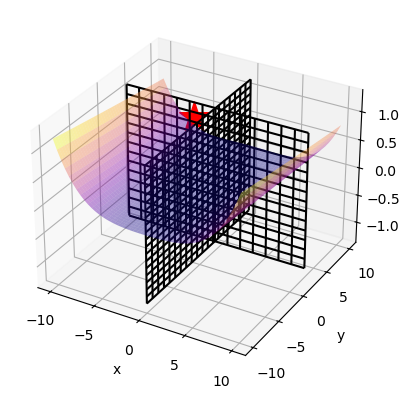

In [28]:
## Plot

# Defining surface and axes
x = np.outer(np.linspace(-10, 10, 50), np.ones(50))
y = x.copy().T
z = 100 * (y - x**2) ** 2 + (1 - x) ** 2

# Constraints

# y >= 3
xc1 = np.linspace(-10, 10, 15)
zc1 = np.linspace(-1.2e6, 1.2e6, 15)
XC1, ZC1 = np.meshgrid(xc1, zc1)
YC1 = 3

# x <= 0
yc2 = np.linspace(-10, 10, 20)
zc2 = np.linspace(-1.2e6, 1.2e6, 20)
YC2, ZC2 = np.meshgrid(yc2, zc2)
XC2 = 0


# dpi=600,figsize=(5,5)
fig = plt.figure()
# syntax for 3-D plotting
ax = plt.axes(projection="3d")
ax.set_xticks([-10, -5, 0, 5, 10])
ax.set_yticks([-10, -5, 0, 5, 10])

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

ax.plot_wireframe(XC1, YC1, ZC1, color="black", alpha=1, zorder=3)
ax.plot_wireframe(XC2, YC2, ZC2, color="black", alpha=1, zorder=3)
ax.plot_surface(x, y, z, cmap="plasma", alpha=0.4, zorder=2)

feasible_region_x = [-5]
feasible_region_y = [7.5]
feasible_region_z = [0.5e6]

ax.scatter(
    feasible_region_x,
    feasible_region_y,
    feasible_region_z,
    c="red",
    marker="*",
    s=500,
    zorder=4,
)

plt.show()

## Rotating Visualization
# def rotate(angle):
#     ax.view_init(azim=angle)

# rot_animation = animation.FuncAnimation(fig, rotate, frames=np.arange(0,362,2),interval=100)

# rot_animation.save('Images/inequality_constrained_rotation.gif', dpi=100, writer='imagemagick')

### Logarithmic Barrier Function Examples

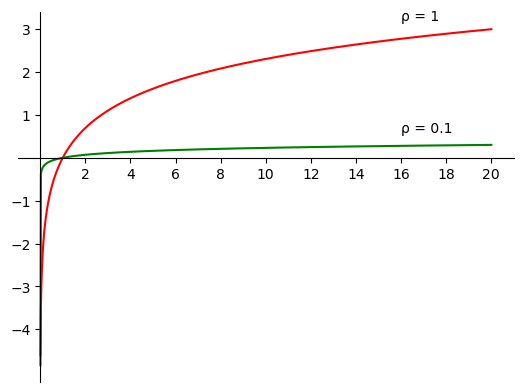

In [29]:
# Defining surface and axes
x = np.linspace(0.01, 20, 1000)
y = np.log(x)
x2 = np.linspace(0.000000000000000000001, 20, 1000)
y2 = 0.1 * np.log(x2)

# setting the axes at the centre
# dpi=600
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines["left"].set_position("zero")
ax.spines["bottom"].set_position("zero")
ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")

ax.set_yticks([-4, -3, -2, -1, 1, 2, 3])
ax.set_xticks([2, 4, 6, 8, 10, 12, 14, 16, 18, 20])

ax.text(x=16, y=3.2, s="ρ = 1")
ax.text(x=16, y=0.6, s="ρ = 0.1")

# plot the function
plt.plot(x, y, "r")
plt.plot(x, y2, "g")

# show the plot
plt.show()

## Visuals Pt. 3

### Quantity Demanded

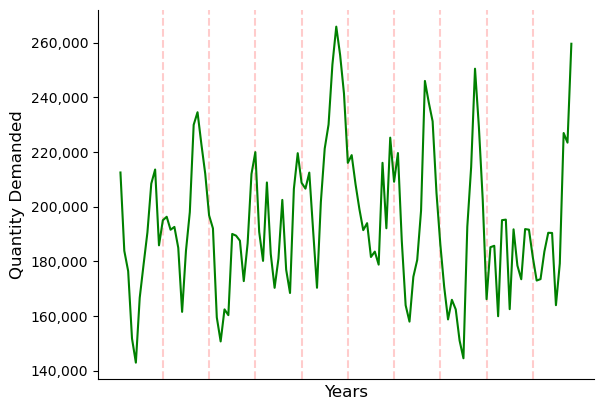

In [30]:
fig, ax = plt.subplots()  # figsize=(10,5), dpi=500)

fmt = "{x:,.0f}"
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")
# ax.spines['bottom'].set_color('none')
# ax.spines['bottom'].set_position(('data',avg_demand))

plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)

for i in range(0, 108, 12):
    line = 108 - i
    ax.axvline(x=line, color="r", linestyle="--", alpha=0.2)

# ax.axhline(y=avg_demand, color='black', linewidth=0.2)

plt.plot(np.arange(T) + 1, quantity_demanded_ar, color="g")
plt.xlabel("Years", size="large")
plt.ylabel("Quantity Demanded", size="large")

plt.show()

### Log Plot

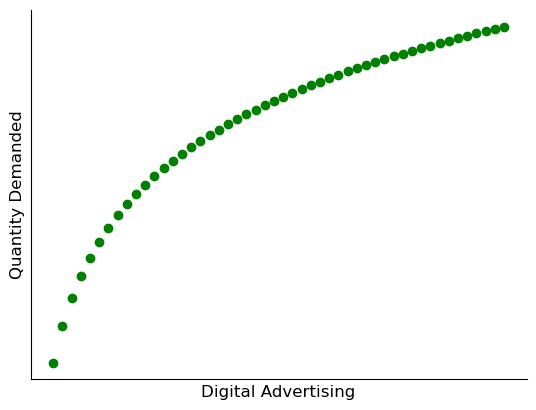

In [31]:
fig, ax = plt.subplots()  # figsize=(10,5), dpi=500)

x = np.linspace(5, 100, 50)

y = np.log(x)

ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")
# ax.spines['bottom'].set_color('none')
# ax.spines['bottom'].set_position(('data',avg_demand))

plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
plt.tick_params(
    axis="y", which="both", bottom=False, top=False, left=False, labelleft=False
)

plt.scatter(x, y, color="g")
plt.xlabel("Digital Advertising", size="large")
plt.ylabel("Quantity Demanded", size="large")

plt.show()

### Profit Function

/var/folders/pm/7cjwl11x1pg4ky99z797kff8thxk7k/T/ipykernel_12121/534695501.py:5: RuntimeWarning: divide by zero encountered in log
  return np.log(x)
/var/folders/pm/7cjwl11x1pg4ky99z797kff8thxk7k/T/ipykernel_12121/534695501.py:14: RuntimeWarning: invalid value encountered in add
  -δ


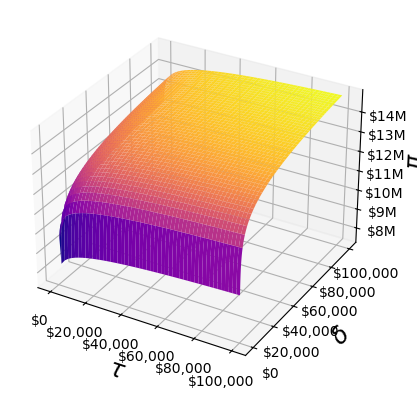

In [32]:
## Plot


def log(x):
    return np.log(x)


# Defining surface and axes
τ = np.outer(np.linspace(0, 100000, 1000), np.ones(1000))
δ = np.outer(np.linspace(0, 100000, 1000), np.ones(1000)).T


profit_function = (
    -δ
    - τ
    - (-0.969412389936114 * log(δ) - 0.481134751696583 * log(τ) + 132.932036807536)
    * (9694.12389936114 * log(δ) + 4811.34751696583 * log(τ) + 70679.6319246373)
    + 1744942.30188501 * log(δ)
    + 866042.55305385 * log(τ)
    + 12722333.7464347
)

fig = plt.figure()  # figsize=(10,10))
# syntax for 3-D plotting
ax = plt.axes(projection="3d")
# ax.set_xticks([-10,-5,0,5,10])
# ax.set_yticks([-10,-5,0,5,10])
ax.set_xlabel(r"$\tau $", fontsize="xx-large")
ax.set_ylabel(r"$\delta $", fontsize="xx-large")
ax.set_zlabel(r"$\pi $", fontsize="xx-large")

fmt = "${x:,.0f}"
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
ax.xaxis.set_major_formatter(tick)


def millions(x, pos):
    "The two args are the value and tick position"
    return "$%1.0fM" % (x * 1e-6)


formatter = FuncFormatter(millions)

ax.zaxis.set_major_formatter(formatter)

# syntax for plotting
ax.plot_surface(τ, δ, profit_function, cmap="plasma")

plt.show()

# Rotating Visualization
# def rotate(angle):
#     ax.view_init(azim=angle)

# rot_animation = animation.FuncAnimation(fig, rotate, frames=np.arange(0,362,2),interval=100)

# rot_animation.save('Images/profit.gif', dpi=100, writer='imagemagick')